The following code implementation demonstrates methods of using pandas dataframe to get the stock information. The stock market data is fetched using the nsepy library. The project contains visualization of the stock movement with respect to various factors. Finally the project predicts future stock prices through Monte Carlo method.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import pandas_datareader as pdr
from datetime import datetime

In [3]:
tech_list = ['SBIN','YESBANK','ICICIBANK']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) 

In [5]:
from nsepy import get_history
from datetime import date
#data = get_history(symbol="SBIN", start=date(2019,6,4), end=date(2019,6,10))
#data.head()

In [6]:
for st in tech_list:
    globals()[st] = get_history(symbol=st,start = start,end=end)

In [7]:
SBIN.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-07-02,SBIN,EQ,259.35,258.95,261.75,254.00,260.00,258.85,257.62,21896701,5.641044e+14,125980,6374311,0.2911
2018-07-03,SBIN,EQ,258.85,259.60,260.90,256.40,258.00,257.50,258.07,16099030,4.154624e+14,92458,4679539,0.2907
2018-07-04,SBIN,EQ,257.50,255.75,258.35,254.50,257.40,257.45,256.66,14206935,3.646328e+14,100359,3726446,0.2623
2018-07-05,SBIN,EQ,257.45,257.90,258.70,255.15,256.60,256.45,256.98,11215032,2.882060e+14,80185,3038238,0.2709
2018-07-06,SBIN,EQ,256.45,256.10,260.80,255.55,256.55,257.20,258.29,16174019,4.177594e+14,129539,5042058,0.3117


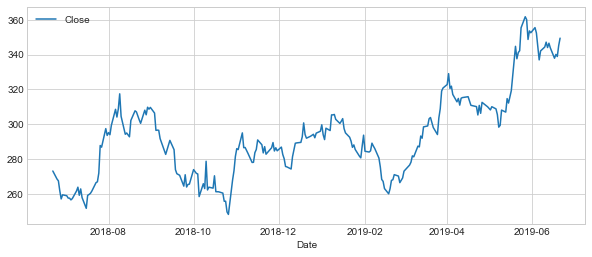

In [34]:
#To plot closing price of SBIN over an year

SBIN['Close'].plot(legend=True,figsize=(10,4))



In [12]:
# To get the volume of yesbank

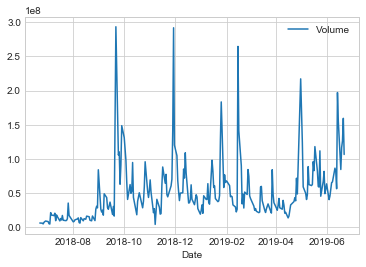

In [35]:
YESBANK['Volume'].plot(legend=True)

In [15]:
# Finding Moving Average

In [36]:
ma_day = [10,20,30]

for i in ma_day:
    col = "Column{}".format(i)
    SBIN[col] = SBIN.Close.rolling(3).mean()

SBIN.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Column10,Column20,Column30
Date,,,,,,,,,,,,,,,,,
2019-06-17,SBIN,EQ,343.80,343.75,343.75,336.95,338.1,337.85,340.23,13779496,4.688198e+14,88557,4878615,0.3477,342.716667,342.716667,342.716667
2019-06-18,SBIN,EQ,337.85,335.50,344.00,333.80,340.8,340.05,338.95,21957480,7.442520e+14,143181,4812132,0.2147,340.566667,340.566667,340.566667
2019-06-19,SBIN,EQ,340.05,343.10,345.20,335.50,338.7,338.85,340.29,16416903,5.586439e+14,111210,4053399,0.2469,338.916667,338.916667,338.916667
2019-06-20,SBIN,EQ,338.85,341.00,346.25,335.60,346.0,345.15,340.31,20626861,7.019550e+14,149410,6971196,0.3380,341.350000,341.350000,341.350000
2019-06-21,SBIN,EQ,345.15,344.80,350.70,343.15,349.1,349.40,348.05,24749090,8.613801e+14,153425,11835989,0.4782,344.466667,344.466667,344.466667


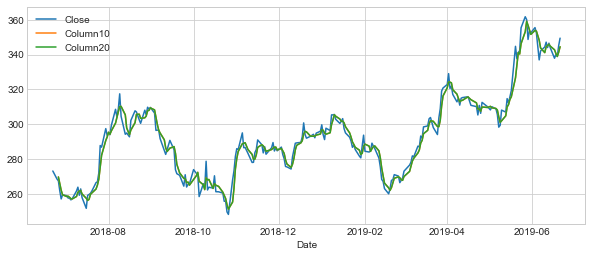

In [38]:
SBIN[['Close','Column10','Column20']].plot(subplots=False,figsize=(10,4))

In [39]:
#To get percentage change in SBIN stock i.e. if you buy at the morning how much profit you could expect 
#at the evening

SBIN['Daily Return'] = SBIN['Close'].pct_change()

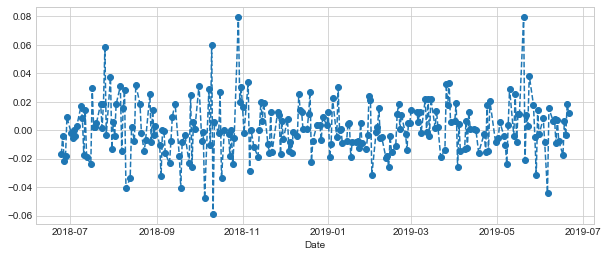

In [40]:
SBIN['Daily Return'].plot(marker='o',linestyle="--",figsize=(10,4))

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


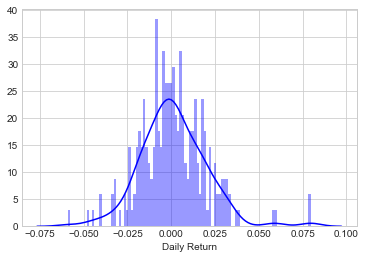

In [41]:
sns.distplot(SBIN['Daily Return'].dropna(),bins=100,color="Blue")

In [42]:
SBIN.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Column10,Column20,Column30,Daily Return
Date,,,,,,,,,,,,,,,,,,
2018-06-22,SBIN,EQ,268.65,269.00,273.70,265.75,273.00,273.05,270.13,20784133,5.614421e+14,189076,7311479,0.3518,NaN,NaN,NaN,NaN
2018-06-25,SBIN,EQ,273.05,271.85,273.15,267.20,268.50,268.45,270.30,10934401,2.955598e+14,90277,2068518,0.1892,NaN,NaN,NaN,-0.016847
2018-06-26,SBIN,EQ,268.45,267.25,271.20,265.40,267.00,267.40,268.27,16867009,4.524935e+14,105136,4317527,0.2560,269.633333,269.633333,269.633333,-0.003911
2018-06-27,SBIN,EQ,267.40,267.35,267.35,261.00,261.05,261.70,263.58,16277655,4.290454e+14,96681,5061636,0.3110,265.850000,265.850000,265.850000,-0.021316
2018-06-28,SBIN,EQ,261.70,260.40,262.00,255.70,257.60,257.00,258.17,21349738,5.511936e+14,123640,6890828,0.3228,262.033333,262.033333,262.033333,-0.017959


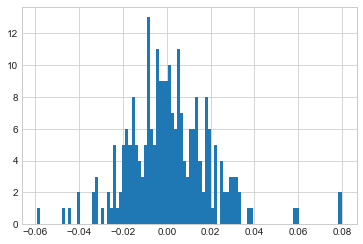

In [43]:
SBIN['Daily Return'].hist(bins=100)

In [44]:
closing_df = DataFrame({'SBIN':SBIN['Close'],'YESBANK':YESBANK['Close'],'ICICIBANK':ICICIBANK['Close']})

In [46]:
closing_df.head()

,ICICIBANK,SBIN,YESBANK
Date,,,
2018-06-22,300.65,273.05,335.10
2018-06-25,289.70,268.45,334.15
2018-06-26,288.10,267.40,335.95
2018-06-27,279.05,261.70,335.60
2018-06-28,271.40,257.00,329.30


In [47]:
tech_rts = closing_df.pct_change()

In [48]:
tech_rts.head()

,ICICIBANK,SBIN,YESBANK
Date,,,
2018-06-22,NaN,NaN,NaN
2018-06-25,-0.036421,-0.016847,-0.002835
2018-06-26,-0.005523,-0.003911,0.005387
2018-06-27,-0.031413,-0.021316,-0.001042
2018-06-28,-0.027414,-0.017959,-0.018772


In [49]:
#comparing returns of SBIN with SBIN

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


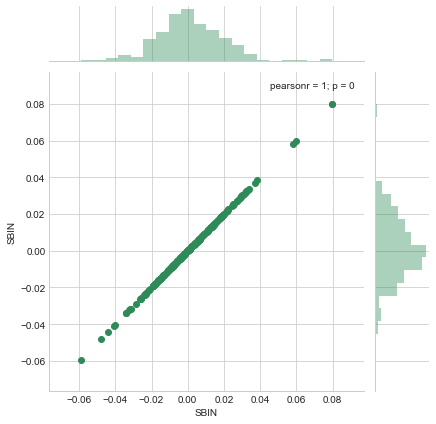

In [50]:
sns.jointplot('SBIN','SBIN',tech_rts,kind="scatter",color="seagreen")

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


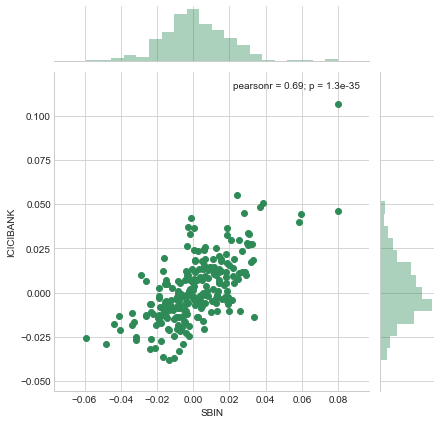

In [51]:
#comparing SBIN and ICici bank
sns.jointplot('SBIN','ICICIBANK',tech_rts,kind="scatter",color="seagreen")

In [52]:
##pair plot

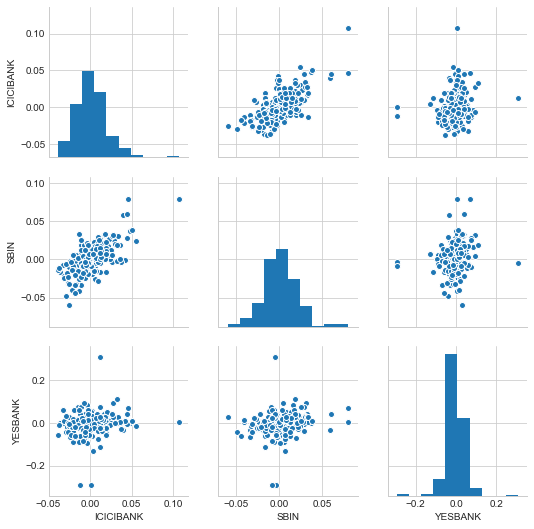

In [53]:
sns.pairplot(tech_rts.dropna())

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


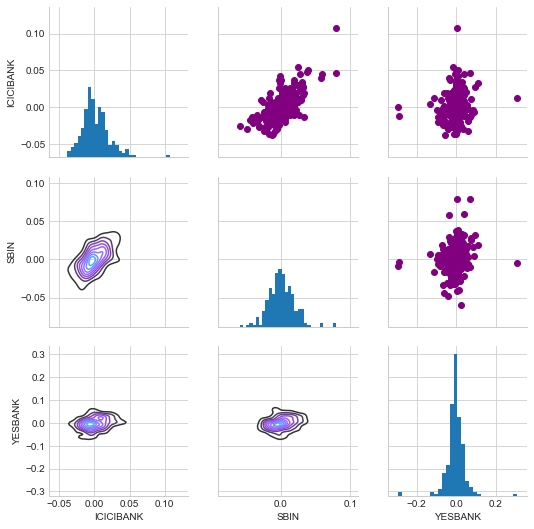

In [60]:
returns_fig = sns.PairGrid(tech_rts.dropna())
returns_fig.map_upper(plt.scatter,color="purple")
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


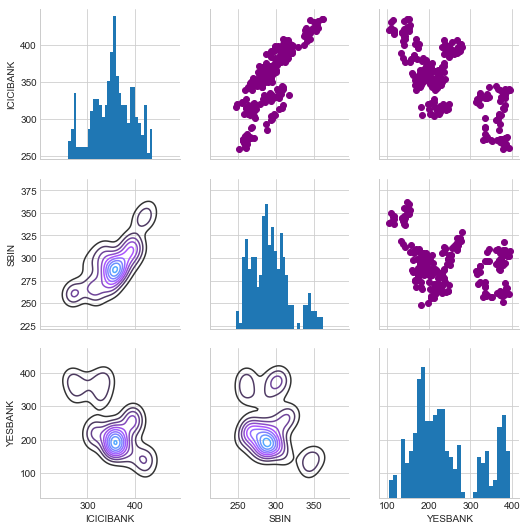

In [61]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color="purple")
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [66]:
# Risk Analysis
SBIN.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Column10,Column20,Column30,Daily Return
Date,,,,,,,,,,,,,,,,,,
2018-06-22,SBIN,EQ,268.65,269.00,273.70,265.75,273.00,273.05,270.13,20784133,5.614421e+14,189076,7311479,0.3518,NaN,NaN,NaN,NaN
2018-06-25,SBIN,EQ,273.05,271.85,273.15,267.20,268.50,268.45,270.30,10934401,2.955598e+14,90277,2068518,0.1892,NaN,NaN,NaN,-0.016847
2018-06-26,SBIN,EQ,268.45,267.25,271.20,265.40,267.00,267.40,268.27,16867009,4.524935e+14,105136,4317527,0.2560,269.633333,269.633333,269.633333,-0.003911
2018-06-27,SBIN,EQ,267.40,267.35,267.35,261.00,261.05,261.70,263.58,16277655,4.290454e+14,96681,5061636,0.3110,265.850000,265.850000,265.850000,-0.021316
2018-06-28,SBIN,EQ,261.70,260.40,262.00,255.70,257.60,257.00,258.17,21349738,5.511936e+14,123640,6890828,0.3228,262.033333,262.033333,262.033333,-0.017959


In [68]:
rets = tech_rts.dropna()
area = np.pi * 20

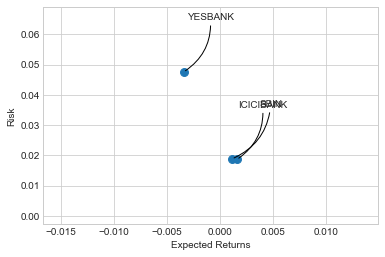

In [77]:
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Returns')
plt.ylabel("Risk")


for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va='bottom',
    arrowprops= dict(arrowstyle = '-',connectionstyle='arc3,rad=-0.3'))

In [78]:
 #value at risk

C:\Users\KARAN S07\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


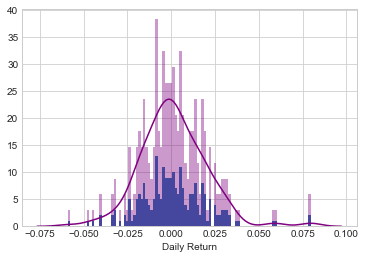

In [81]:
SBIN['Daily Return'].hist(bins=100)
sns.distplot(SBIN['Daily Return'].dropna(),bins=100,color="purple")

In [84]:
rets.quantile(0.05)

ICICIBANK   -0.025229
SBIN        -0.025996
YESBANK     -0.063509
Name: 0.05, dtype: float64

In [85]:
#Monte carlo Method

In [90]:
days = 365

dt = 1/365

mu = rets['SBIN'].mean()

sigma = rets['SBIN'].std()



In [91]:
def montycarlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [92]:
SBIN.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Column10,Column20,Column30,Daily Return
Date,,,,,,,,,,,,,,,,,,
2018-06-22,SBIN,EQ,268.65,269.00,273.70,265.75,273.00,273.05,270.13,20784133,5.614421e+14,189076,7311479,0.3518,NaN,NaN,NaN,NaN
2018-06-25,SBIN,EQ,273.05,271.85,273.15,267.20,268.50,268.45,270.30,10934401,2.955598e+14,90277,2068518,0.1892,NaN,NaN,NaN,-0.016847
2018-06-26,SBIN,EQ,268.45,267.25,271.20,265.40,267.00,267.40,268.27,16867009,4.524935e+14,105136,4317527,0.2560,269.633333,269.633333,269.633333,-0.003911
2018-06-27,SBIN,EQ,267.40,267.35,267.35,261.00,261.05,261.70,263.58,16277655,4.290454e+14,96681,5061636,0.3110,265.850000,265.850000,265.850000,-0.021316
2018-06-28,SBIN,EQ,261.70,260.40,262.00,255.70,257.60,257.00,258.17,21349738,5.511936e+14,123640,6890828,0.3228,262.033333,262.033333,262.033333,-0.017959


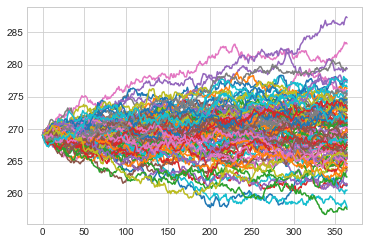

In [93]:
start_price = 269.00

for run in range(100):
    plt.plot(montycarlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("")

In [95]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = montycarlo(start_price,days,mu,sigma)[days-1]

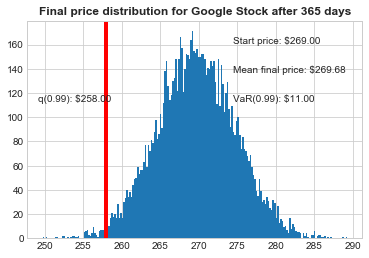

In [97]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
